In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Loading the data


In [2]:
data = pd.read_csv('housing.csv')

# Exporing the data
first we'll check the info if we have any null values
we'll drop the null values and save it in the data as inplace = true

In [3]:
# data.info()
# this data info is used to check if the data contains any null values
# total bedrooms contains about 200 null values it was less as compared to the data
# so we dropped this
data.dropna(inplace=True)

# Dividing the data into Two
okay so we'll split the data into two one for learning and one for testing , testing data won't be feeded to the model so it'll be new to it

In [4]:
from sklearn.model_selection import train_test_split
X = data.drop(["median_house_value"] ,axis=1)
# the X will contain the data without median house value
# while the Y will only contain the median_house_value pandas series
y = data["median_house_value"]


In [5]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

In [6]:
train_data = X_train.join(y_train)
# train_data

# Explanation
Okay so we have divide the data into two test and train
we won't mess with the test data
after that we have joined the data of training the model with a join
hist() will give us the histogram for all the fields

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

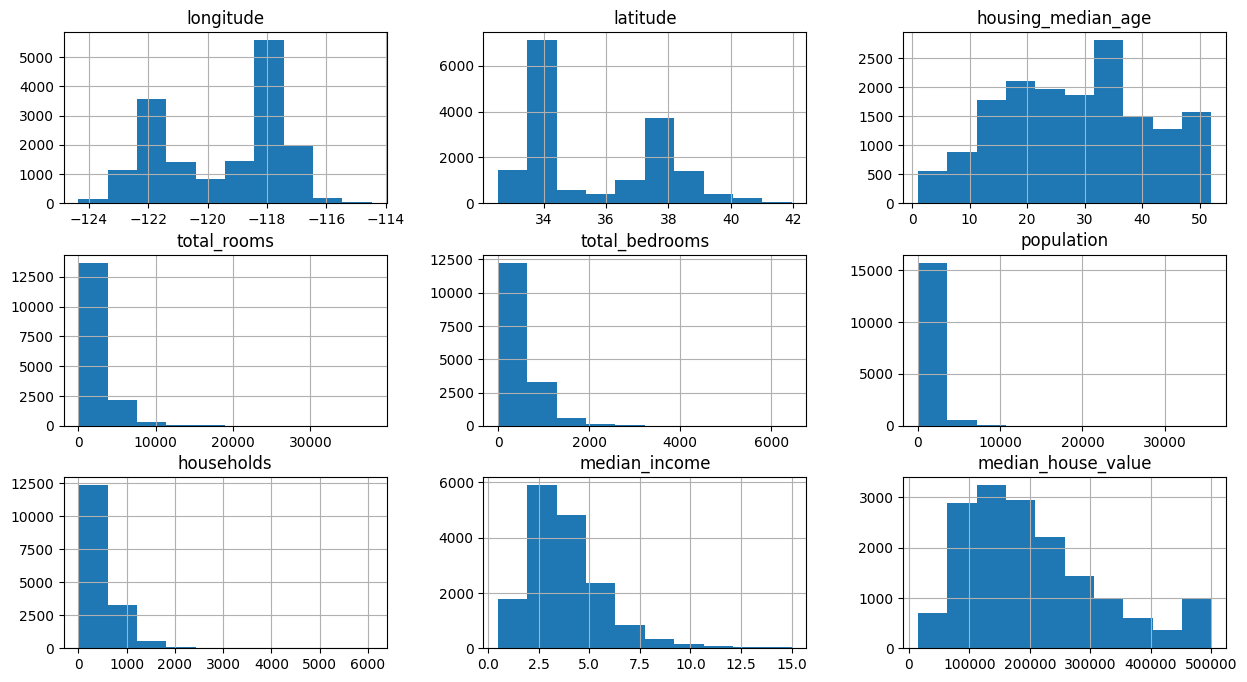

In [7]:
# train_data.hist()
# just to get the histogram oh the size overalaps lets fix this
train_data.hist(figsize=(15,8))

<ipython-input-8-08bacd42739f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr() , annot=True ,cmap="YlGnBu" )


<Axes: >

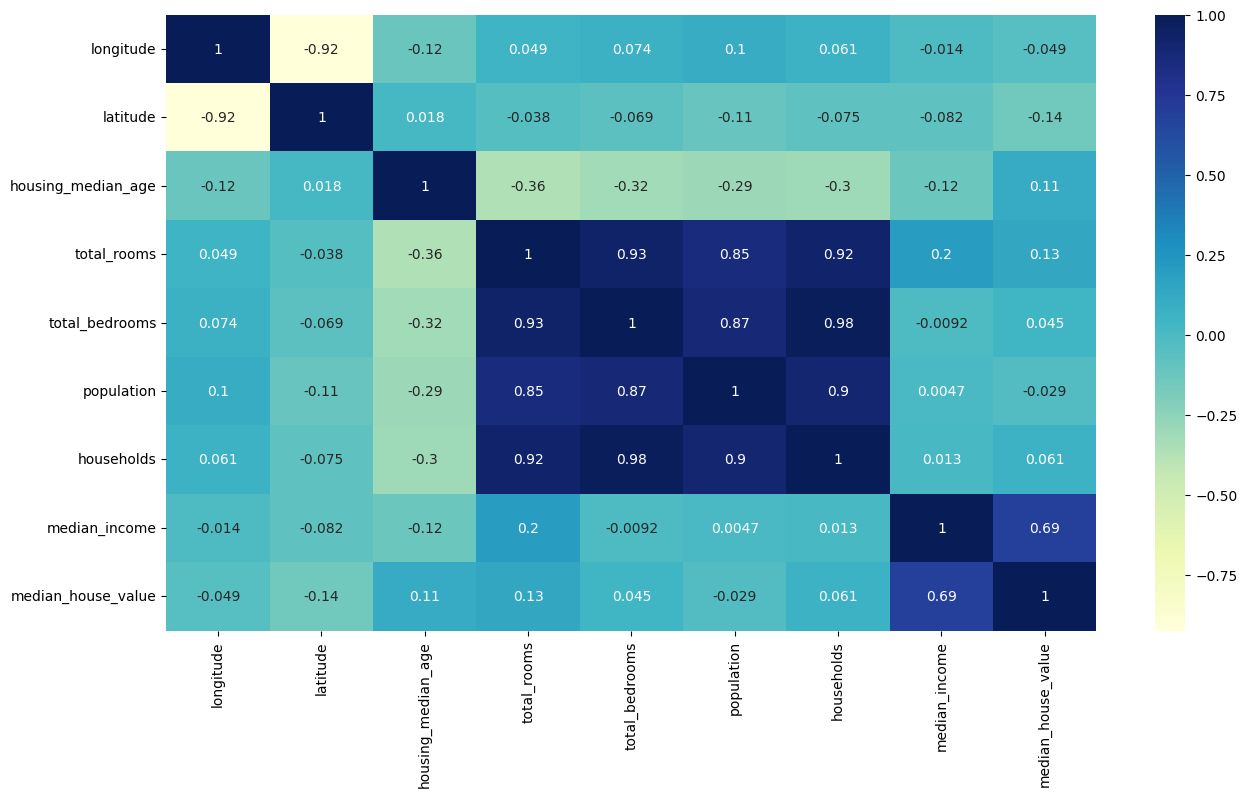

In [8]:
# Now lets look at the correlation of the different features
# first lets adjust the fig size
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot=True ,cmap="YlGnBu" )

It can be seen that the medium income correlates the highest with median house value
while the latitude is negatively correlated
upon looking at the graphs of feature they are all left skewed lets take log of these features

In [9]:
train_data['total_rooms']=np.log(train_data['total_rooms']+ 1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+ 1)
train_data['population']=np.log(train_data['population'] + 1)
train_data['households']=np.log(train_data['total_rooms']+ 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

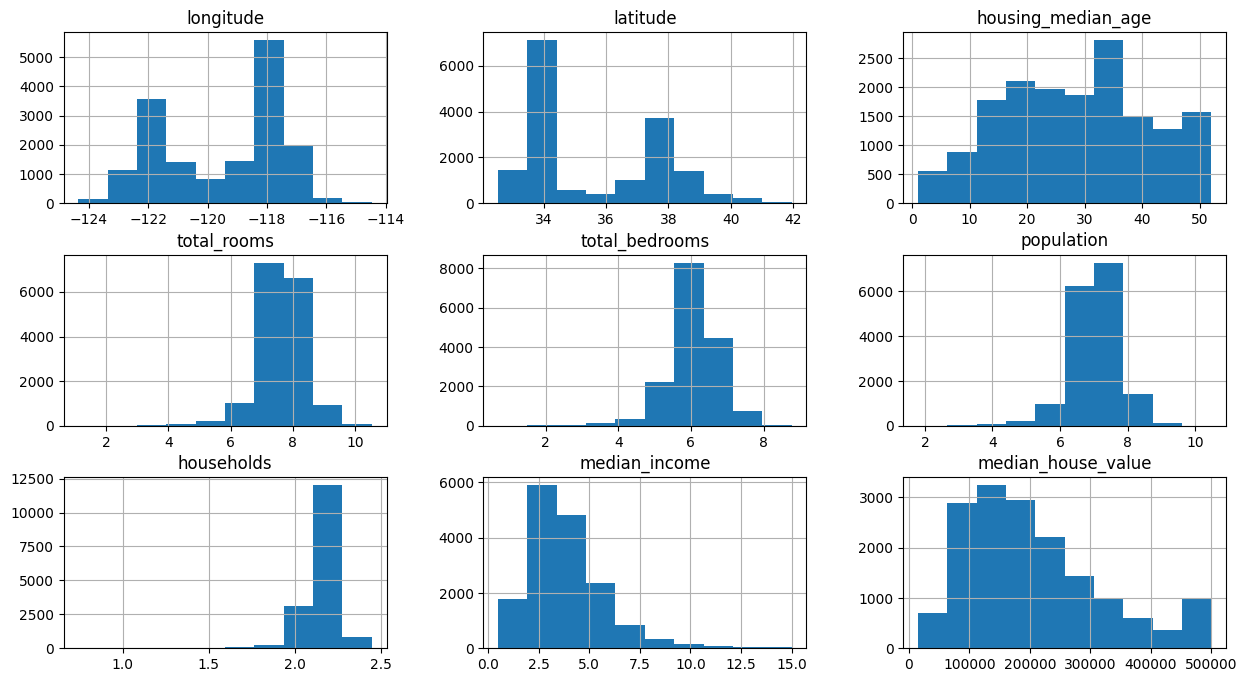

In [10]:
train_data.hist(figsize=(15,8))

# Ocean Proximity
we have this textual or categorical feature in the data it can be ignored , but we'll use it  but we'll convert it to a numerical value how? we won't randomly give it a value but turn this into a binary 0,1

In [11]:
# train_data.ocean_proximity.value_counts()
# checking the value counts now we'll assign random 0,1

In [12]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop("ocean_proximity", axis=1)
# assigning dummies to ocean proximity and then dropping the ocean proximity and saving it to the training



<Axes: >

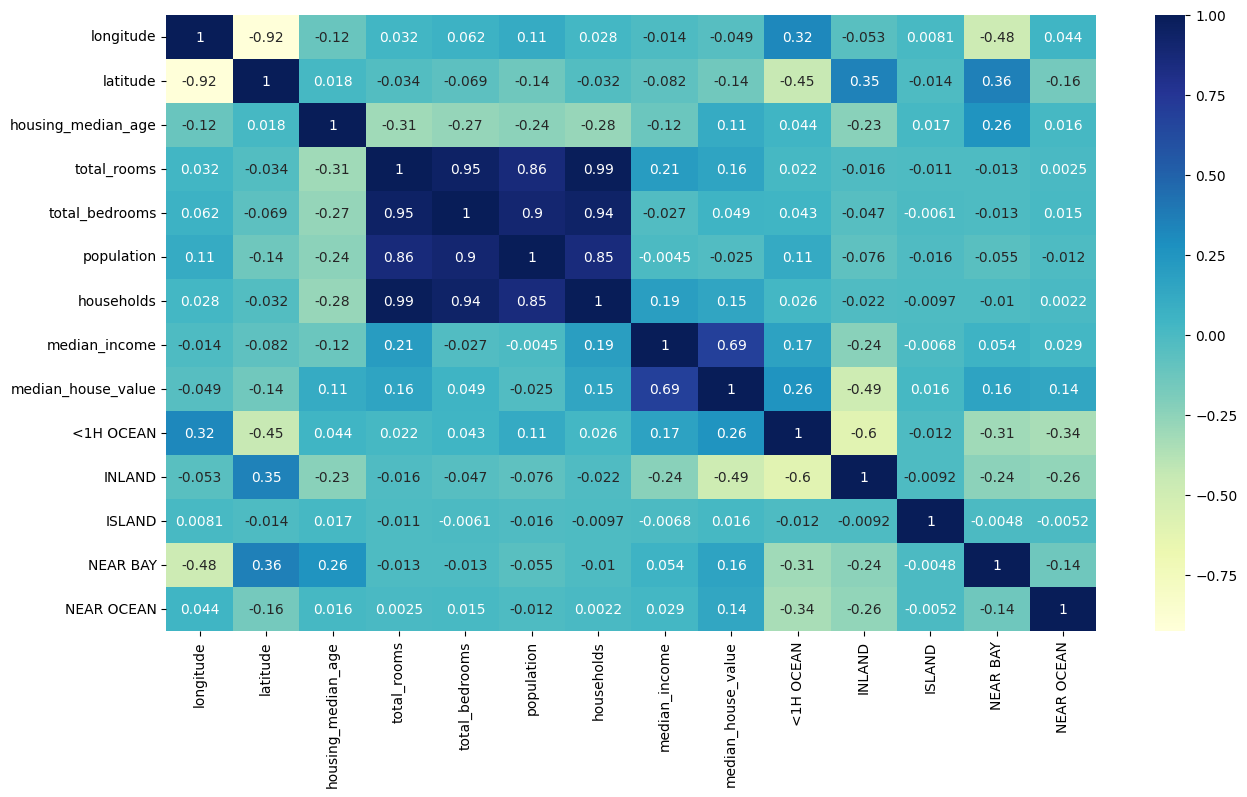

In [13]:
# now lets check the correlation again and observe the correlation
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot=True ,cmap="YlGnBu" )

#Visualizing the data
now lets visualize the data on scatterplot to check the data
we'll visualize on the target feature median house value so we'll set the hue to median_house_value
and the data will be train_data
x,y will be the longitude and latitude pallete shoulde be set to coolwarn

<Axes: xlabel='latitude', ylabel='longitude'>

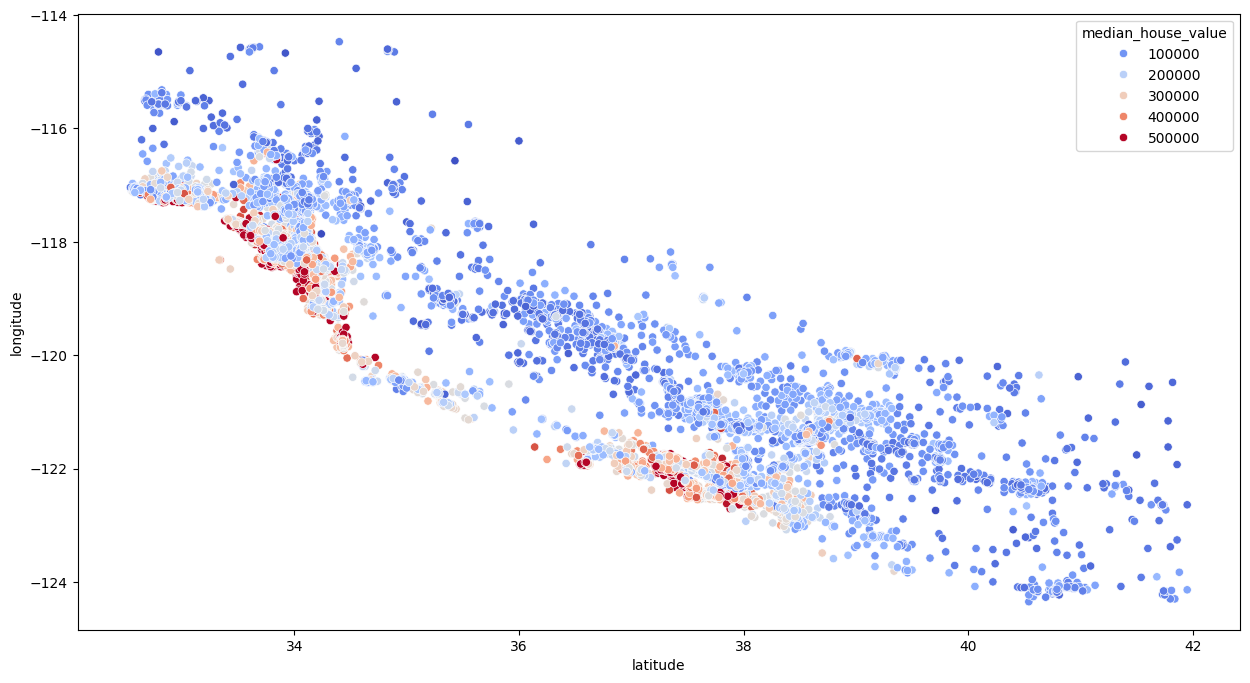

In [14]:
plt.figure(figsize= (15,8))
sns.scatterplot(x='latitude', y ='longitude', data = train_data,hue ='median_house_value',palette='coolwarm')

#observed
Upon examining as we can see from the plot that the house on coastal or close to 1 hr to the sea are marked in red have the highest prices

# Exstracting usefull features
there is feature total rooms and bedrooms lets extract the bedrooms per room
2: another one is no of rooms in a househould

In [15]:
train_data['bedrooms_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms']= train_data['total_rooms'] / train_data['households']

<Axes: >

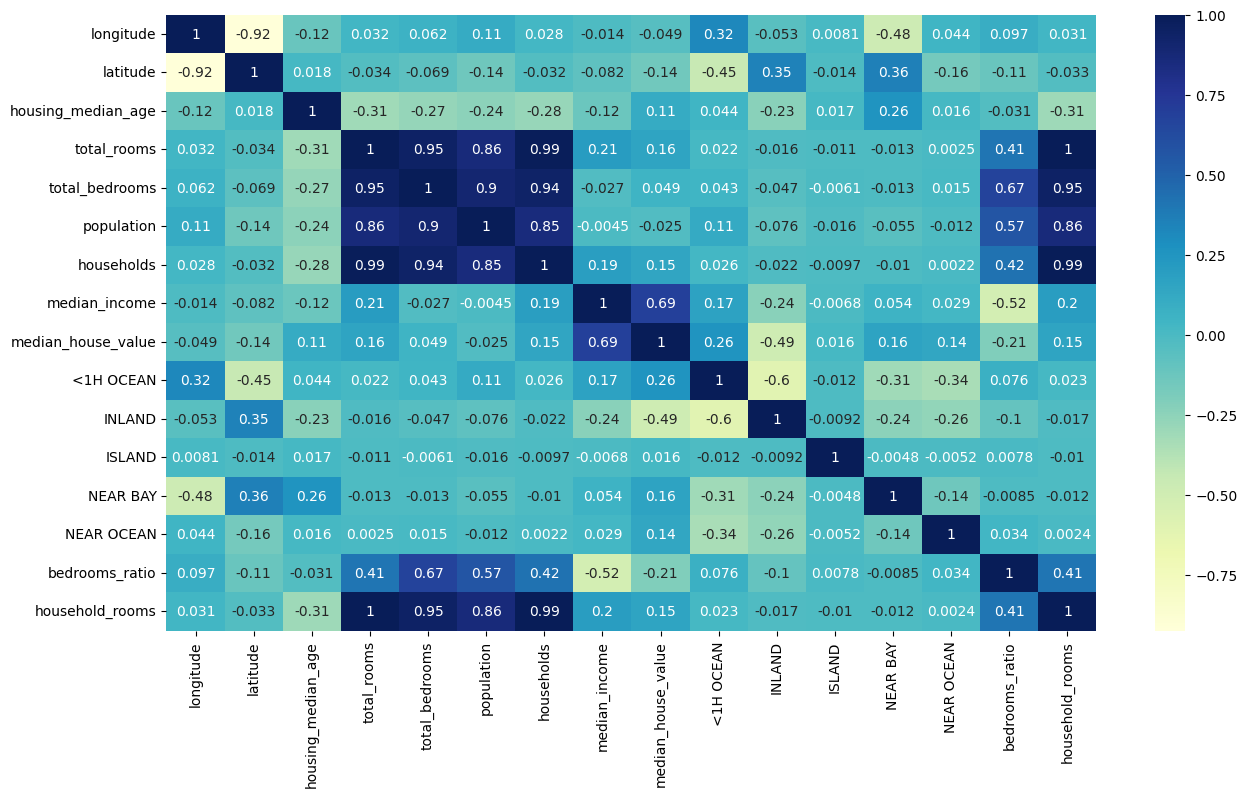

In [16]:
# now lets check the correlation again and observe the correlation
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot=True ,cmap="YlGnBu" )

#Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
X_train ,y_train = train_data.drop(['median_house_value'], axis =1),train_data['median_house_value']
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

#Testing Linear Regression
lets test our linear Regression on test data

In [18]:
test_data = X_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+ 1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+ 1)
test_data['population']=np.log(test_data['population'] + 1)
test_data['households']=np.log(test_data['total_rooms']+ 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop("ocean_proximity", axis=1)

test_data['bedrooms_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms']= test_data['total_rooms'] / test_data['households']



In [19]:
X_test , y_test = test_data.drop(['median_house_value'], axis=1) , test_data['median_house_value']

In [20]:
reg.score(X_test,y_test)

0.6610561190148602

The Score 0.6712044 is not bad but also not too good now we'll achieve best score with
#Random Forest Model
Ensemble methods are techniques that create multiple models and then combine them to produce improved results

In [21]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

already achieved 82%

In [22]:
forest.score(X_test,y_test)

0.8102110481809087

We'll use GridSearch with cross validation, what will divide the data into k for example k =10 then 9 data will be kept for training and 1 will be kept for testing

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators":[100,200,300],
    "min_samples_split":[2,4],
    "max_depth":[None,4,8]
}
grid_search=GridSearchCV(forest ,param_grid,cv=5,
                         scoring='neg_mean_squared_error',
                         return_train_score=True)
grid_search.fit(X_train,y_train)

In [ ]:
best_forest = grid_search.best_estimator_

In [28]:
best_forest.score(X_test,y_test)

0.8220443231361811